In [1]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

#try:
#  %tensorflow_version 2.x  # Colab only.
#except Exception:
#  pass

import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
# 更多 imports

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [3]:
# 載入數據
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)

170500096/170498071 [==============================] - 10s 0us/step
x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000,)


In [4]:
# classe 數
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [5]:
# 利用函數接口建模
i = Input(shape=x_train[0].shape)
# x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
# x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
# x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)

# x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [6]:
# 編譯
# 確認使用 GPU
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# 訓練
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3126 - accuracy: 0.5473 - val_loss: 0.8970 - val_accuracy: 0.6851
Epoch 2/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8445 - accuracy: 0.7050 - val_loss: 0.9310 - val_accuracy: 0.6779
Epoch 3/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6917 - accuracy: 0.7615 - val_loss: 0.6994 - val_accuracy: 0.7660
Epoch 4/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5848 - accuracy: 0.7984 - val_loss: 0.7141 - val_accuracy: 0.7697
Epoch 5/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.4960 - accuracy: 0.8286 - val_loss: 0.8028 - val_accuracy: 0.7518
Epoch 6/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.4178 - accuracy: 0.8572 - val_loss: 0.6057 - val_accuracy: 0.8009
Epoch 7/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.3563 - accuracy: 0.8771 - val_loss: 0.5970 - val_accuracy:

In [8]:
# 用數據增強
# 二訓練選一或者持續訓練
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
1562/1562 [==============================] - 25s 16ms/step - loss: 0.5445 - accuracy: 0.8275 - val_loss: 0.5321 - val_accuracy: 0.8289
Epoch 2/50
1562/1562 [==============================] - 25s 16ms/step - loss: 0.4424 - accuracy: 0.8530 - val_loss: 0.4820 - val_accuracy: 0.8498
Epoch 3/50
1562/1562 [==============================] - 25s 16ms/step - loss: 0.4062 - accuracy: 0.8651 - val_loss: 0.4673 - val_accuracy: 0.8495
Epoch 4/50
1562/1562 [==============================] - 26s 16ms/step - loss: 0.3805 - accuracy: 0.8716 - val_loss: 0.4529 - val_accuracy: 0.8574
Epoch 5/50
1562/1562 [==============================] - 25s 16ms/step - loss: 0.3633 - accuracy: 0.8763 - val_loss: 0.4400 - val_accuracy: 0.8606
Epoch 6/50
1562/1562 [==============================] - 25s 16ms/step - loss: 0.3532 - accuracy: 0.8824 - val_loss: 0.4530 - val_accuracy: 0.8556
Epoch 7/50
1562/1562 [==============================] - 25s 16ms/step - loss: 0.3351 - accuracy: 0.8874 - val_loss: 0.4530 -

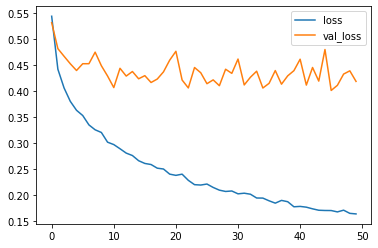

In [9]:
# 每迭代繪製損失
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

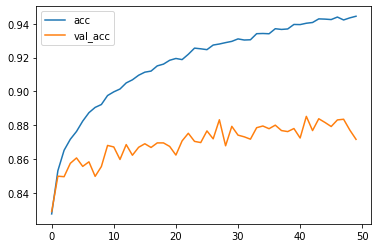

In [10]:
# 每迭代繪製精準度
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[903  15  19  12   3   2   8   6  15  17]
 [  6 958   0   0   1   1   1   2   1  30]
 [ 28   3 824  32  28  18  34  21   3   9]
 [ 16   4  32 710  37 103  41  40   2  15]
 [ 13   1  44  17 850  16  26  32   0   1]
 [  5   5  16  85  17 831  10  28   0   3]
 [  9   3  27  29   8   8 909   3   1   3]
 [  4   1   7  14  22  12   1 936   0   3]
 [ 59  27   5   8   3   3   7   8 859  21]
 [  5  37   2   4   0   6   2   3   5 936]]


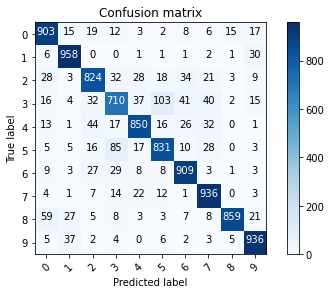

In [11]:
# 繪製混淆矩陣
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



In [12]:
# 下標籤
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

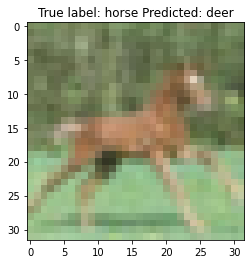

In [13]:
# 顯示分錯樣本
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

In [14]:
# 總結模型各層形狀與使用參數
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)       